<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw07_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Example 1:**

Consider CEV(constant elasticity of variance model)

$$d S_{t} = 0.03 S_{t} \, d t + \sigma S_{t}^{\gamma} \, d W_{t}, \, S_{0} = 100.$$

- Write a pseudo code and python code for vanilla option price.

- For $\sigma = 0.2$ and $\gamma = 1$, compute call price with $T = 1$ and $K = 97$. Dose it recover option price given by BSM formula?

- Can you demostrate the weak or strong convergence rate?

- Download option data and calibrate volatility and elasticity constant from 5 month call options.

- Write a pseudo code and python code for vanilla option price.

In [0]:
import numpy as np
import scipy.optimize as so
import scipy.stats as ss
import matplotlib.pyplot as plt

In [0]:
def SDE_path(mu, sigma, s0, T0, T1, n):
  t = np.linspace(T0, T1, n+1)
  S = s0 + np.zeros(n+1)
  for i in range(n):
    S[i+1] = S[i] + mu(S[i],t[i]) * (t[i+1] - t[i]) + sigma(S[i],t[i]) * np.sqrt(t[i+1] - t[i]) * np.random.normal()
  return t,S

In [0]:
r = 0.03
sig = 0.2
gamma = 1
mu = lambda x,t: r*x
sigma = lambda x,t: gamma*x*sig
s0 = 100
T0 = 0
T1 = 1
n = 100

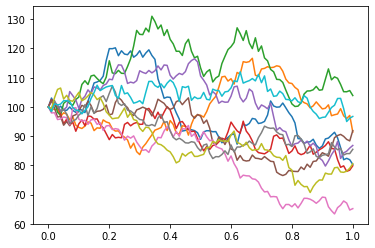

In [15]:
for i in range (10):
  [t,p] = SDE_path(mu, sigma, s0, T0, T1, n)
  plt.plot(t,p)

- For $\sigma = 0.2$ and $\gamma = 1$, compute call price with $T = 1$ and $K = 97$. Dose it recover option price given by BSM formula?

In [0]:
def call_payoff(r, T, K, ST):
  price = max(0,ST - K) * np.exp(-r * T)
  return price

In [26]:
T = T1 - T0
K = 97
meshl = 0.001
meshn = int(T/meshl)

price_list = np.zeros(n)
for i in range(n):
  [t,S] = SDE_path(mu, sigma, s0, T0, T1, meshn)
  price_list[i] = call_payoff(r, T, K, S[-1])
final_price = price_list.mean()
final_price

11.386383668934695

The price of call option using Euler method is $11.3863$

Then we compute the price of call option using BSM

In [0]:
class VanillaOption:
    def __init__(
        self,
        otype = 1, # 1: 'call'
                  # -1: 'put'
        strike = 97.,
        maturity = 1.,
        market_price = 10.):
      self.otype = otype
      self.strike = strike
      self.maturity = maturity
      self.market_price = market_price #this will be used for calibration
      
        
    def payoff(self, s): #s: excercise price
      otype = self.otype
      k = self.strike
      maturity = self.maturity
      return max([0, (s - k)*otype])

In [0]:
class Gbm:
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = 0.03,
                 vol_ratio = 0.2
                ):
        self.init_state = init_state
        self.drift_ratio = drift_ratio
        self.vol_ratio = vol_ratio

In [0]:

def bsm_price(self, vanilla_option):
    s0 = self.init_state
    sigma = self.vol_ratio
    r = self.drift_ratio
    
    otype = vanilla_option.otype
    k = vanilla_option.strike
    maturity = vanilla_option.maturity
    
    d1 = (np.log(s0 / k) + (r + 0.5 * sigma ** 2) 
          * maturity) / (sigma * np.sqrt(maturity))
    d2 = d1 - sigma * np.sqrt(maturity)
    
    return (otype * s0 * ss.norm.cdf(otype * d1) #line break needs parenthesis
            - otype * np.exp(-r * maturity) * k * ss.norm.cdf(otype * d2))

Gbm.bsm_price = bsm_price

In [0]:
gbm1 = Gbm(init_state = 100,#initial:100
           drift_ratio = 0.03,#interest rate: 0.03%
           vol_ratio = 0.2#volatility fixed at 20%
              )
option1 = VanillaOption(
    otype = 1,#call option
    strike = 97.,#strike: 97
    maturity = T1 - T0 #maturity: 1.0
)

In [43]:
gbm1.bsm_price(option1)

11.014613780922488

The price of call option using BSM is $11.01461375$

- Download option data and calibrate volatility and elasticity constant from 5 month call options.

In [44]:
%cd~

!git clone https://github.com/cengaiyeung/20MA573.git

/root
Cloning into '20MA573'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 318 (delta 71), reused 0 (delta 0), pack-reused 197
Receiving objects: 100% (318/318), 806.46 KiB | 18.75 MiB/s, done.
Resolving deltas: 100% (178/178), done.


In [45]:
%cd 20MA573/src00/
%ls

/root/20MA573/src00
20bsm01_test.ipynb   20european_options_class.ipynb  bsm01.py
20bsm_formula.ipynb  20optiondata2.txt


In [46]:
#Read four-column data
#columns are otype, maturity, strike, option_price
np_option_data = np.loadtxt('20optiondata2.txt', comments='#', delimiter=',')
print('>>>>>>otype, maturity, strike, option_price')
print(np_option_data)

>>>>>>otype, maturity, strike, option_price
[[  1.           0.16666667  97.           5.32705461]
 [  1.           0.16666667  99.           3.86224255]
 [  1.           0.16666667 101.           2.7204371 ]
 [  1.           0.16666667 103.           2.1202793 ]
 [  1.           0.41666667  97.           7.23756307]
 [  1.           0.41666667  99.           5.95053461]
 [  1.           0.41666667 101.           5.2640122 ]
 [  1.           0.41666667 103.           4.97493422]]


In [0]:
'''==============
below defines for underlying process
================='''
gbm1 = Gbm(
    init_state = 100., #market data
    drift_ratio = .05, #market data
    vol_ratio = .1 #initial guess
)

In [0]:
'''====================
create option_list from the data
======================='''

num_row = np_option_data.shape[0]
option_list = []

for i in range(num_row):
  option1 = VanillaOption(
      otype = np_option_data[i,0],
      strike = np_option_data[i,2],
      maturity = np_option_data[i,1],
      market_price = np_option_data[i,3]
  )   
  option_list.append(option1)

In [0]:
'''==========
define a method for error function
============'''

def error_function(vol, gbm, option_list):
  gbm.vol_ratio = vol
  error = 0
  for i in np.arange(len(option_list)):
    error = error + ((option_list[i]).market_price - gbm.bsm_price(option_list[i]))**2    
  return error


'''==========
define a method to seek for a calibrated volatility
============'''

def bsm_calibration(gbm, option_list):
  init_vol = .1 #initial guess
  return so.fmin(error_function, init_vol, args = (gbm, option_list), disp = 0)[0]

In [50]:
# Take options of 5-months maturity
filter2 = list(filter(lambda x: x.maturity == 5/12, option_list))
calibrated_volatility2 = bsm_calibration(gbm1, filter2)
print('5-mon calibrated_volatility is' ,calibrated_volatility2)

5-mon calibrated_volatility is 0.1839843750000003


In [51]:
gbm1.vol_ratio = calibrated_volatility2

calibrated_price_list2 = [gbm1.bsm_price(filter2[i]) for i in range(len(filter2))]
print('The option price calculated from calibrated volatility is')
print(calibrated_price_list2)

The option price calculated from calibrated volatility is
[7.540104147003916, 6.340281448569769, 5.270421573192927, 4.330492653848275]


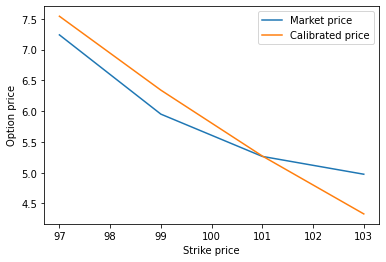

In [53]:
x = [filter2[i].strike for i in range(len(filter2))]
y1 = [filter2[i].market_price for i in range(len(filter2))]
plt.plot(x, y1, label='Market price')

y2 = calibrated_price_list2
plt.plot(x, y2, label = 'Calibrated price')

plt.ylabel('Option price')
plt.xlabel('Strike price')
plt.legend();